In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy import random as rd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_validate
from sklearn.preprocessing import StandardScaler

In [2]:
num_data_points = 100
white_noise_points = 100

X = np.linspace(0,10,num_data_points) #+ rd.normal(size = num_data_points)
y = np.linspace(0,10,num_data_points) + 2*rd.normal(size = num_data_points)

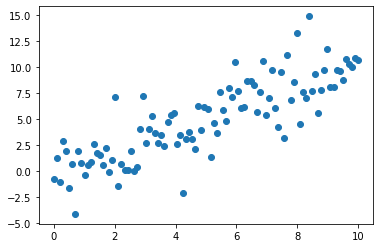

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
X_model = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_model,y)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
#Error cuadratico medio
((y_pred - y_test)**2).sum() / len(y_pred)

4.628829973091725

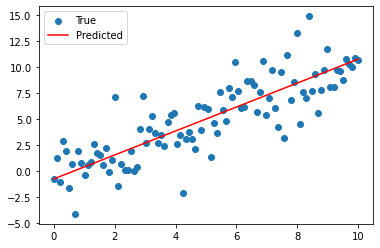

In [6]:
plt.scatter(X,y, label = 'True')
plt.plot(X,model.predict(X_model), label = 'Predicted', c = 'r')

plt.legend()
plt.show()

# Que pasa si ponemos ruido blanco?

In [7]:
#white_noise_points = 40

X_white_noise = rd.random(size = (num_data_points,white_noise_points))
X = np.hstack([X_model,X_white_noise])

X_train, X_test, y_train, y_test = train_test_split(X,y)

model_wn = LinearRegression()
model_wn.fit(X_train, y_train)

LinearRegression()

In [33]:
X_train.shape

(75, 101)

In [34]:
#Error cuadratico medio
y_pred_train = model_wn.predict(X_train)
((y_pred_train - y_train)**2).sum() / len(y_pred_train)

2.2459034317664126e-29

In [35]:
#Error cuadratico medio
y_pred_test = model_wn.predict(X_test)
((y_pred_test - y_test )**2).sum() / len(y_pred_test)

16.59363722188245

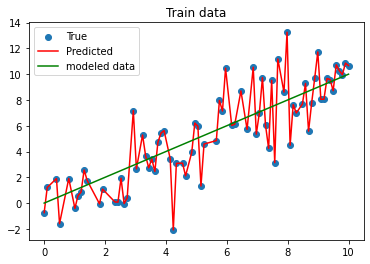

In [10]:
#Esto esta bien?
sorted_index = np.argsort(X_train[:,0])


plt.scatter(X_train[:,0][sorted_index],
            y_train[sorted_index     ], label = 'True')

plt.plot(X_train[:,0][sorted_index],
         y_pred_train[sorted_index], label = 'Predicted', c = 'r')

plt.plot([0,10],[0,10], label = 'modeled data', c = 'g')

plt.title('Train data')
plt.legend()
plt.show()

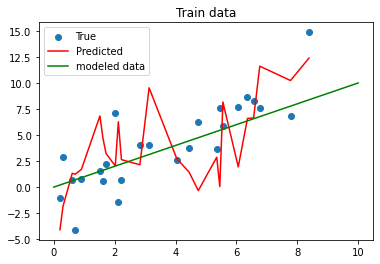

In [11]:
#Esto esta bien?
sorted_index = np.argsort(X_test[:,0])

plt.scatter(X_test[:,0][sorted_index],
            y_test[sorted_index], label = 'True')

plt.plot(X_test[:,0][sorted_index],
         y_pred_test[sorted_index     ], label = 'Predicted', c = 'r')

plt.plot([0,10],[0,10], label = 'modeled data', c = 'g')

plt.title('Train data')
plt.legend()
plt.show()

# Para esto hay que tunear el estimador

In [12]:
param_alpha = np.logspace(-3,2)
param_grid = {'alpha':param_alpha}

model = Lasso(max_iter = 10**5)
grid = GridSearchCV(model, param_grid = param_grid, return_train_score = True,scoring = 'neg_mean_squared_error')

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [14]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=Lasso(max_iter=100000),
             param_grid={'alpha': array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648...
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_mean_squared_error')

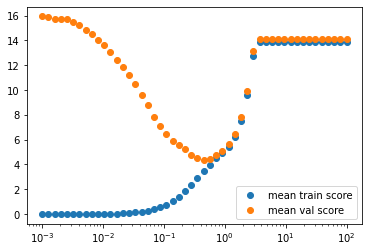

In [15]:
mean_val_score = grid.cv_results_['mean_test_score']
mean_train_score = grid.cv_results_['mean_train_score']
alpha = grid.cv_results_['param_alpha'].data

plt.scatter(alpha, - mean_train_score, label = 'mean train score')
plt.scatter(alpha, - mean_val_score, label = 'mean val score')

plt.legend()
plt.xscale('log')
plt.show()

In [16]:
-grid.best_score_

4.342427604411853

In [17]:
((grid.predict(X_train_scaled) - y_train)**2).sum() / len(y_train)

3.73563696358547

In [18]:
cross_validate_results = cross_validate(grid, X_train_scaled, y_train, scoring = 'neg_mean_squared_error')
-cross_validate_results['test_score'].mean()

4.914536779843219

# Por que esta dando una linea recta?

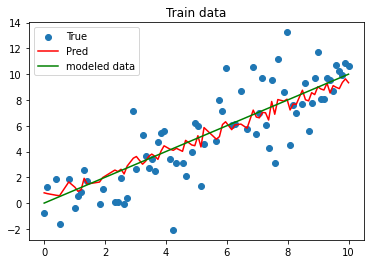

In [19]:
#Esto esta bien?
y_pred_train = grid.predict(X_train_scaled)
sorted_index = np.argsort(X_train[:,0])

plt.scatter(X_train[:,0][sorted_index],
            y_train[sorted_index], label = 'True')

plt.plot(X_train[:,0][sorted_index],
            y_pred_train[sorted_index], label = 'Pred', c = 'r')

plt.plot([0,10],[0,10], label = 'modeled data', c = 'g')

plt.title('Train data')
plt.legend()
plt.show()

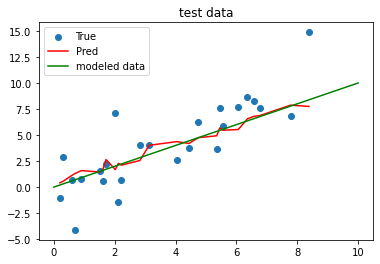

In [20]:
#Esto esta bien?
y_pred_test = grid.predict(X_test_scaled)
sorted_index = np.argsort(X_test[:,0])

plt.scatter(X_test[:,0][sorted_index],
            y_test[sorted_index], label = 'True')

plt.plot(X_test[:,0][sorted_index],
         y_pred_test[sorted_index], label = 'Pred', c = 'r')

plt.plot([0,10],[0,10], label = 'modeled data', c = 'g')

plt.title('test data')
plt.legend()
plt.show()

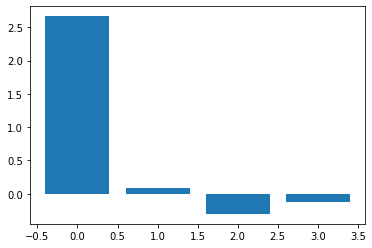

In [21]:
best_estimator_coef = grid.best_estimator_.coef_[grid.best_estimator_.coef_ != 0]

plt.bar(range(len(best_estimator_coef)),best_estimator_coef)
plt.show()

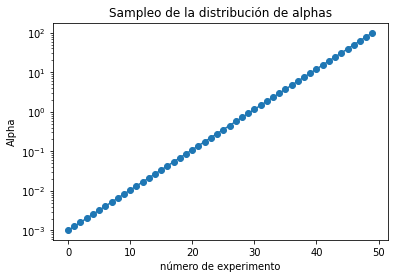

In [22]:
plt.title('Sampleo de la distribución de alphas')
plt.plot(grid.cv_results_['param_alpha'].data,'-o')
plt.ylabel('Alpha')
plt.xlabel('número de experimento')
plt.yscale('log')
plt.show()

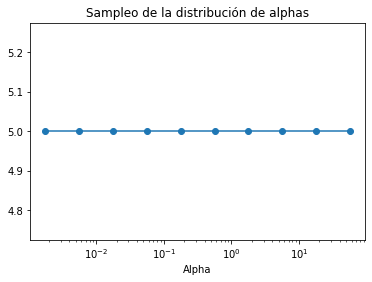

In [23]:
evaluation_points = np.log(np.array(grid.cv_results_['param_alpha'].data, dtype = 'float'))

altura, posicion = np.histogram(evaluation_points)
posicion = (posicion[1:] + posicion[:-1]) / 2

plt.title('Sampleo de la distribución de alphas')
plt.plot(np.exp(posicion), altura,'-o')
plt.xlabel('Alpha')
plt.xscale('log')
plt.show()

# Vamos a ver que pasa con los parametros

In [24]:
list_params = []
list_train_score = []
list_test_score = []

for index, alpha in enumerate(param_alpha):
    print(index, end= ', ')
    model = Lasso(alpha = alpha, max_iter = 10**5)
    model.fit(X_train_scaled, y_train)
    model_params = model.coef_
    
    cross_validate_results = cross_validate(model, 
                                            X_train_scaled, 
                                            y_train, 
                                            scoring = 'neg_mean_squared_error', 
                                            return_train_score = True)
    
    list_test_score.append( cross_validate_results['test_score'].mean())
    list_train_score.append(cross_validate_results['train_score'].mean())
    list_params.append(model_params)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

In [25]:
def get_n_param(list_params, n):
    return list_params[n]

def get_list_param(list_params, n):
    return list(map(lambda list_params: get_n_param(list_params,n), list_params))

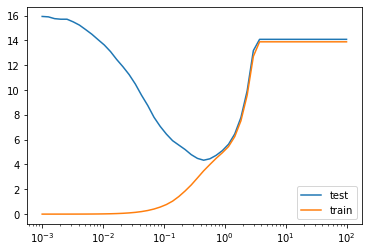

In [26]:
plt.plot(param_alpha, -np.array(list_test_score), label = 'test')
plt.plot(param_alpha, -np.array(list_train_score),label = 'train')

plt.legend()
plt.xscale('log')
plt.show()

In [27]:
best_index = np.argmax(list_test_score)
best_alpha = param_alpha[best_index]
best_alpha

0.4498432668969444

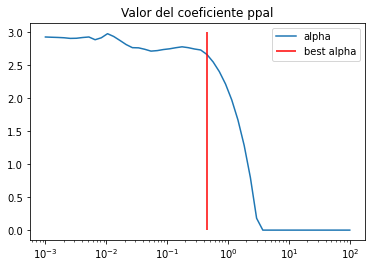

In [28]:
plt.plot(param_alpha, get_list_param(list_params, 0), label = 'alpha')
plt.vlines(best_alpha,0,3, color = 'r', label = 'best alpha')

plt.xscale('log')
plt.title('Valor del coeficiente ppal')
plt.legend()
plt.show()

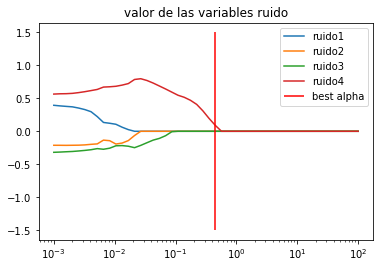

In [29]:
plt.plot(param_alpha, get_list_param(list_params, 1), label = 'ruido1')
plt.plot(param_alpha, get_list_param(list_params, 2), label = 'ruido2')
plt.plot(param_alpha, get_list_param(list_params, 3), label = 'ruido3')
plt.plot(param_alpha, get_list_param(list_params, 4), label = 'ruido4')

plt.vlines(best_alpha,-1.5,1.5, color = 'r', label = 'best alpha')

plt.xscale('log')
plt.title('valor de las variables ruido')
plt.legend()
plt.show()

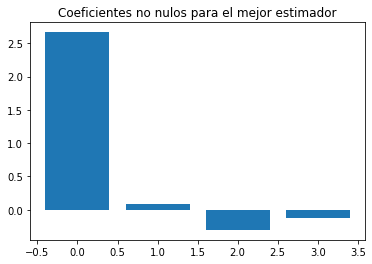

In [30]:
best_estimator_coef = list_params[best_index]
best_estimator_coef = best_estimator_coef[best_estimator_coef != 0]

plt.bar(range(len(best_estimator_coef)),best_estimator_coef)
plt.title('Coeficientes no nulos para el mejor estimador')
plt.show()